In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
df = pd.read_csv('final_analytics_takehome.csv')
df.head()

,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating
0,9,spiderman,2018-10-02 03:00:21,2018-10-02 03:08:19,3,sf,0,3.25,5
1,12,superman,2018-10-02 03:01:30,2018-10-02 03:09:16,2,sf,0,2.95,5
2,3,hulk,2018-10-02 03:01:45,2018-10-02 03:09:15,2,sf,0,3.22,5
3,10,spiderman,2018-10-02 03:02:08,2018-10-02 03:15:34,3,sf,0,2.29,5
4,9,scarecrow,2018-10-02 03:02:13,2018-10-02 04:02:47,4,sf,0,2.93,1


In [171]:
df.describe()

,user_id,num_riders,num_near_misses,price,rating
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,10.220716,3.100678,0.029042,3.324985,3.745402
std,5.906874,1.445901,0.251216,1.224522,1.063871
min,1.000000,1.000000,0.000000,2.000000,1.000000
25%,5.000000,2.000000,0.000000,2.490000,3.000000
50%,10.000000,3.000000,0.000000,2.950000,3.000000
75%,15.000000,4.000000,0.000000,3.410000,5.000000
max,20.000000,5.000000,5.000000,6.500000,5.000000


In [172]:
#as necessary step we need to remove the columns that are having end_time earlier than start time
#let's take a look first
errors = df[df['end_time'] <=df['start_time']].index
errors

Int64Index([ 718,  950, 1010, 1012, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
            1027, 1029, 1030, 1031, 1032],
           dtype='int64')

In [173]:
df.drop(errors, inplace = True)
df#1015 rows now, removed the error rows

,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating
0,9,spiderman,2018-10-02 03:00:21,2018-10-02 03:08:19,3,sf,0,3.25,5
1,12,superman,2018-10-02 03:01:30,2018-10-02 03:09:16,2,sf,0,2.95,5
2,3,hulk,2018-10-02 03:01:45,2018-10-02 03:09:15,2,sf,0,3.22,5
3,10,spiderman,2018-10-02 03:02:08,2018-10-02 03:15:34,3,sf,0,2.29,5
4,9,scarecrow,2018-10-02 03:02:13,2018-10-02 04:02:47,4,sf,0,2.93,1
5,15,robin,2018-10-02 03:03:00,2018-10-02 03:06:15,3,south sf,0,2.48,5
6,15,hulk,2018-10-02 03:03:07,2018-10-02 03:18:07,5,sf,0,3.42,5
7,19,scarecrow,2018-10-02 03:03:27,2018-10-02 03:12:18,1,sf,0,5.30,5
8,14,venom,2018-10-02 03:03:53,2018-10-02 03:17:18,3,sf,0,2.32,3
9,8,batman,2018-10-02 03:04:27,2018-10-02 03:16:24,4,south sf,0,2.92,5


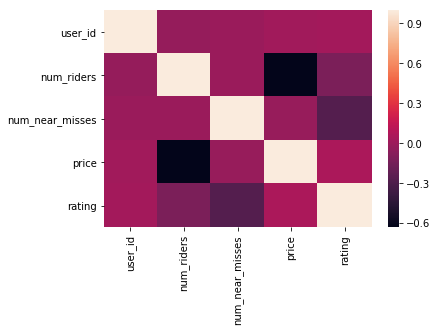

In [174]:
#see potantial correlation
sns.heatmap(df.corr())

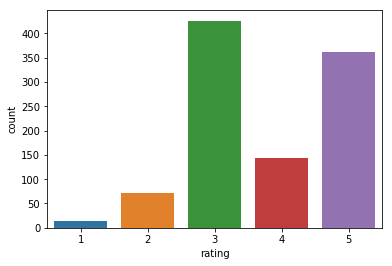

In [175]:
sns.countplot(x = df['rating'])

In [176]:
#check if duplicates
df = df.loc[:,~df.columns.duplicated()]

In [213]:
#starting prediction now
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [150]:
import time
from datetime import datetime
from datetime import timedelta

In [177]:
#trip length should be a great metric in prediction, so adding it to the dataframe now , format="%Y/%m/%d %H:%M:%S"
df.start_time = pd.to_datetime(df['start_time'])

In [178]:
df.end_time = pd.to_datetime(df['end_time'])

In [179]:
df['time_diff'] = df["end_time"] - df["start_time"]

In [180]:
df["time_diff"]=df["time_diff"].apply(timedelta.total_seconds)

In [181]:
#adding hour as a metric
df['start_hour']= df.start_time.dt.hour
df['end_hour']= df.end_time.dt.hour

In [182]:
le = LabelEncoder()
df.region = le.fit_transform(df.region)

In [183]:
##categorical car_id to prepare for the prediction model
df.car_id = pd.Categorical(df.car_id)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 1028
Data columns (total 12 columns):
user_id            1017 non-null int64
car_id             1017 non-null category
start_time         1017 non-null datetime64[ns]
end_time           1017 non-null datetime64[ns]
num_riders         1017 non-null int64
region             1017 non-null int64
num_near_misses    1017 non-null int64
price              1017 non-null float64
rating             1017 non-null int64
time_diff          1017 non-null float64
start_hour         1017 non-null int64
end_hour           1017 non-null int64
dtypes: category(1), datetime64[ns](2), float64(2), int64(7)
memory usage: 136.7 KB


In [185]:
#drop timestamp columns to make sure all number columns are in the model training process
df=df.drop(['start_time', 'end_time'], axis=1)

In [188]:
df.head()

,user_id,car_id,num_riders,region,num_near_misses,price,rating,time_diff,start_hour,end_hour
0,9,6,3,0,0,3.25,5,478.0,3,3
1,12,7,2,0,0,2.95,5,466.0,3,3
2,3,1,2,0,0,3.22,5,450.0,3,3
3,10,6,3,0,0,2.29,5,806.0,3,3
4,9,5,4,0,0,2.93,1,3634.0,3,4


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 1028
Data columns (total 10 columns):
user_id            1017 non-null int64
car_id             1017 non-null int64
num_riders         1017 non-null int64
region             1017 non-null int64
num_near_misses    1017 non-null int64
price              1017 non-null float64
rating             1017 non-null int64
time_diff          1017 non-null float64
start_hour         1017 non-null int64
end_hour           1017 non-null int64
dtypes: float64(2), int64(8)
memory usage: 127.4 KB


In [190]:
X = df.drop('rating', axis = 1) #Features
y = df['rating']   # Target Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)#create 30% split for test

In [200]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
#as you can see from the output, bootsrap is true

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [201]:
df.columns

Index(['user_id', 'car_id', 'num_riders', 'region', 'num_near_misses', 'price',
       'rating', 'time_diff', 'start_hour', 'end_hour'],
      dtype='object')

In [202]:
rfc_pred = rfc.predict(X_test)

In [203]:
print(classification_report(y_test,rfc_pred))#the precision is not so ideal thhough

             precision    recall  f1-score   support

          1       0.33      1.00      0.50         1
          2       0.62      0.44      0.52        18
          3       0.75      0.52      0.61       153
          4       0.31      0.11      0.17        44
          5       0.40      0.76      0.53        90

avg / total       0.57      0.53      0.52       306



In [204]:
# 10-Fold Cross validation
print(np.mean(cross_val_score(rfc, X_train, y_train, cv=10)))#after cross validation in 10 folds still not so good

0.539243562247


In [205]:
print(accuracy_score(y_test,rfc_pred)*100)#not so good

52.614379085


In [206]:
#starting a loop to optimize the model and cross validation is also a neccesary step
from sklearn.model_selection import RandomizedSearchCV

In [291]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =1000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt','log2']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters,cv=10,cross validation in ten folds
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=7, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 15.4min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 220}


In [316]:
#the above give me the most optimized parameters in the model, applying them to see the performance
#regenerate the training and testing dataset
X = df.drop('rating', axis = 1)
y = df['rating']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [318]:
rfc = RandomForestClassifier(n_estimators=1000,max_depth=220,max_features='auto', random_state=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=220, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [319]:
rfc_pred = rfc.predict(X_test)

In [320]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.88      0.50      0.64        14
          3       0.79      0.52      0.63       132
          4       0.30      0.08      0.12        39
          5       0.41      0.87      0.56        70

avg / total       0.62      0.55      0.53       255



C:\Users\yaruo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [321]:
print(np.mean(cross_val_score(rfc, X_train, y_train, cv=10)))

0.546418888216


In [322]:
print(accuracy_score(y_test,rfc_pred)*100)

54.9019607843
